# Parcial 2 Diseño de PID mediante Lugar Geométrico de las Raíces para la planta Térmica
- Miguel Angel Alvarez Guzman
- Andres David Guerrero Rivera
- Jose Vicente Zabaleta Montiel

## **Distribucion del trabajo**
### Miguel: Especificaciones, polos deseados y cálculo PID
**Basicamente Puntos 3 y 4**
Responsabilidades:
- Definir las especificaciones de desempeño: %OS y Ts.
- Calcular ζ y ωn, luego los polos dominantes deseados.
- Resolver las condiciones de fase y módulo para obtener Kp, Ti, Td, con ayuda simbólica o numérica.
- Ajustar si es necesario para cumplir condiciones.

Entregables:
- Cálculos desarrollados (puede usar SymPy o MATLAB Symbolic Toolbox).
- Tabla con valores obtenidos y justificación
- Validación de que el punto cumple ∠L = -180° y |L| = 1

### Andres: Simulación y comparación experimental
**Basicamente Puntos 5 y 6**
Responsabilidades:
- Simular la respuesta al escalón de Gcl(s) con los valores hallados.
- Implementar el PID en el script de TempLABUdeA.
- Realizar la prueba práctica, recolectar los datos de temperatura y control.
- Comparar los datos experimentales con la simulación (gráficas, %OS, Ts).

Entregables:
- Código de simulación y control.
- Archivos CSV de los datos experimentales.
- Gráficas comparativas: simulación vs experimento.

### Jose: Modelado simbólico y trazado del LGR
**Basicamente Puntos 1 y 2**
Responsabilidades:
- Implementar en Python/MATLAB el modelo simbólico de la función de transferencia en lazo abierto L(s).
- Verificar que el numerador y denominador cumplan con lo especificado.
- Graficar el Lugar Geométrico de las Raíces con valores iniciales de Ti = τ y Td = τ/10.
- Identificar el recorrido de los polos al variar Kp.

Entregables:
- Código con control.matlab o control de Python.
- Gráfica del LGR.
- Captura/análisis de comportamiento de los polos.

# Resultados

In [ ]:
! pip install control matplotlib numpy ipywidgets sympy

   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---- ----------------------------------- 0.3/2.2 MB ? eta -:--:--
   ---- ----------------------------------- 0.3/2.2 MB ? eta -:--:--
   ---- --------------------------


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## 1. Función de transferencia en lazo abierto

In [ ]:
from sympy import symbols, simplify

s, Kp, K, Ti, Td, tau = symbols('s K_p K T_i T_d tau')  

G_PID = Kp * (1 + 1/(Ti * s) + Td * s)  
G_PID = simplify(G_PID)  # Combina términos

# Función de la planta
G_planta = K / (tau * s + 1)

# Función en lazo abierto
L = G_PID * G_planta
L = simplify(L)
print("L(s) =", L)
#Numerador y denominador de L
num_L, den_L = L.as_numer_denom()
print("Numerador de L(s):", num_L)
print("Denominador de L(s):", den_L)


L(s) = K*K_p*(T_i*s*(T_d*s + 1) + 1)/(T_i*s*(s*tau + 1))
Numerador de L(s): K*K_p*(T_i*s*(T_d*s + 1) + 1)
Denominador de L(s): T_i*s*(s*tau + 1)


## 2. Trazado del Lugar Geométrico de las Raíces

In [2]:
import control as ctrl
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact
# Parámetros del sistema
def graficar_lugar_geometrico_pid(Kp_pid):
    Kp_sys = 0.3593
    tau = 171.7428

    # PID: parámetros iniciales
    Ti = tau
    Td = tau / 10

    # Controlador PID: Kp*(1 + 1/(Ti*s) + Td*s)
    # Se escribe como (Kp*Td*s^2 + Kp*s + Kp/Ti) / s
    num_pid = [Kp_pid * Td, Kp_pid, Kp_pid / Ti]
    den_pid = [1, 0]

    G_pid = ctrl.TransferFunction(num_pid, den_pid)
    G_plant = ctrl.TransferFunction([Kp_sys], [tau, 1])

    # Sistema en lazo abierto
    L = G_pid * G_plant

    # Vector de ganancias a evaluar
    k_vect = np.linspace(0, 10, 500)

    # Graficar LGR
    plt.figure(figsize=(8, 5))
    ctrl.root_locus(L, kvect=k_vect, grid=True)
    plt.title("Lugar Geométrico de las Raíces con PID")
    plt.xlabel("Re")
    plt.xlim([-0.05, 0.01])  # o ajusta según lo que veas

    plt.ylabel("Im")
    plt.axvline(x=0, color='r', linestyle='--')  # Eje de estabilidad
    plt.show()
interact(graficar_lugar_geometrico_pid, Kp_pid=(1, 300, 1))


interactive(children=(IntSlider(value=150, description='Kp_pid', max=300, min=1), Output()), _dom_classes=('wi…

<function __main__.graficar_lugar_geometrico_pid(Kp_pid)>

### 3. Desarrollo
- Sobreimpulso (%OS): mide cuánto supera temporalmente la salida su valor final al aplicar una entrada escalón

Se calcula así: %OS = $\frac{Y_{max} - Y_{final}}{Y_{final}}$

**Para el Caso actual debera ser de 10%**

- Tiempo de asentamiento (Ts): es cuánto tarda la respuesta en mantenerse dentro de un rango pequeño

**Para el Caso actual debera ser 2 minutos**

### Encontrar $\zeta $ y $w_n$

La ecuación para encontrar $\zeta$ y $\omega_n$ es:

%OS $  \approx 100, e^{-\frac{\pi \zeta}{\sqrt{1-\zeta^2}}} $

$ T_s \approx \frac{4}{\zeta \omega_n}, \quad \omega_n = \text{frecuencia natural}. $


In [ ]:
from sympy import symbols, Eq, exp, sqrt, pi, solve, N

zeta, wn, Ts, OS = symbols('zeta wn Ts OS', real=True, positive=True)

OS_value = 10  # 10%
Ts_value = 2   # 2 minutos

# Ecuación del sobreimpulso (OS ≈ 100 * exp(-pi*zeta / sqrt(1 - zeta**2)))
eq1 = Eq(OS, 100 * exp(-pi * zeta / sqrt(1 - zeta**2)))
# Ecuación del tiempo de asentamiento (Ts ≈ 4 / (zeta * wn))
eq2 = Eq(Ts, 4 / (zeta * wn))
# Sustituir valores numéricos
eq1_num = eq1.subs(OS, OS_value)
eq2_num = eq2.subs(Ts, Ts_value)

# Resolver la ecuación de OS para zeta
zeta_solutions = solve(eq1_num, zeta)
# Evaluar las soluciones numéricamente  
zeta_numeric = [N(sol) for sol in zeta_solutions if sol.is_real and sol > 0]
# Usar el valor numérico de zeta para encontrar wn
wn_val = solve(eq2_num.subs(zeta, zeta_numeric[0]), wn)[0]
zeta= zeta_numeric[0]
print("Valor de zeta:", zeta)
print("Valor de wn:", wn_val)

Valor de zeta: 0.591155033798898
Valor de wn: 3.38320725639016


$ s_{1,2} = -\zeta \omega_n \pm j \omega_n \sqrt{1 - \zeta^2} $  

In [ ]:
s1 = symbols('s1', real=True, positive=True)
# Ecuación del polo dominante
first_pole = -zeta * wn_val + wn_val * sqrt(1 - zeta**2)*1j
print("Polo S1:", first_pole)
s2 = symbols('s2', real=True, positive=True)
# Ecuación del segundo polo
second_pole = -zeta * wn_val - wn_val * sqrt(1 - zeta**2)*1j
print("Polo S2:", second_pole)

Polo S1: -2.0 + 2.72875270768368*I
Polo S2: -2.0 - 2.72875270768368*I


### 4. Condiciones de fase y modulo
- Fase

$\angle (T_i T_d s_d^2 + T_i s_d + 1) - \angle s_d - \angle (\tau s_d + 1) = -180^\circ - \angle K_p - \angle K.$

- Modulo

$K_p K \frac{\left| T_i T_d s_d^2 + T_i s_d + 1 \right|}{\left| T_i \right| \left| s_d \right| \left| \tau s_d + 1 \right|} = 1.$

In [4]:
import numpy as np
from scipy.optimize import minimize
from numpy import angle, abs, pi

# Parámetros de la planta
K = 0.3593
tau = 171.7428
s_d = -2.0 + 2.72875270768368j

# Ecuaciones a resolver
def condiciones(x):
    Kp, Ti, Td = x

    # Numerador del PID
    num = Ti * Td * s_d**2 + Ti * s_d + 1
    den = Ti * s_d * (tau * s_d + 1)

    # Fase: argumento total
    fase = angle(num) - angle(s_d) - angle(tau * s_d + 1)
    fase_error = (fase + pi) % (2*pi) - pi  # Normalizado entre [-pi, pi]

    # Módulo
    modulo = abs(num / den)
    modulo_total = Kp * K * modulo
    modulo_error = modulo_total - 1

    # Función objetivo: error cuadrático total
    return fase_error**2 + modulo_error**2

# Valores iniciales
x0 = [1.0, 100.0, 10.0]  # Kp, Ti, Td
bounds = [(0.001, 1000), (0.1, 1000), (0.001, 1000)]

# Minimización
resultado = minimize(condiciones, x0, bounds=bounds)

Kp_opt, Ti_opt, Td_opt = resultado.x
print("Parámetros óptimos del PID:")
print(f"Kp = {Kp_opt:.4f}")
print(f"Ti = {Ti_opt:.4f}")
print(f"Td = {Td_opt:.4f}")


Parámetros óptimos del PID:
Kp = 24.4664
Ti = 99.9936
Td = 19.6913


### Evaluando Resultados

In [ ]:
# Reutilar los resultados obtenidos
Kp_pre, Ti_opt, Td_opt = resultado.x

# Calculamos el valor actual de |L(sd)|
s_d = -2.0 + 2.72875270768368j

# Numerador y denominador del controlador PID
num = Ti_opt * Td_opt * s_d**2 + Ti_opt * s_d + 1
den = Ti_opt * s_d * (tau * s_d + 1)

# Magnitud actual
modulo_actual = abs(K * (num / den)) * Kp_pre

# Ajuste afín de Kp
Kp_ajustado = Kp_pre / modulo_actual

print(f"Magnitud actual |L(sd)| = {modulo_actual:.6f}")
print(f"Kp ajustado = {Kp_ajustado:.4f}")


Magnitud actual |L(sd)| = 1.000048
Kp ajustado = 24.4653


### Verificacion Grafica


Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


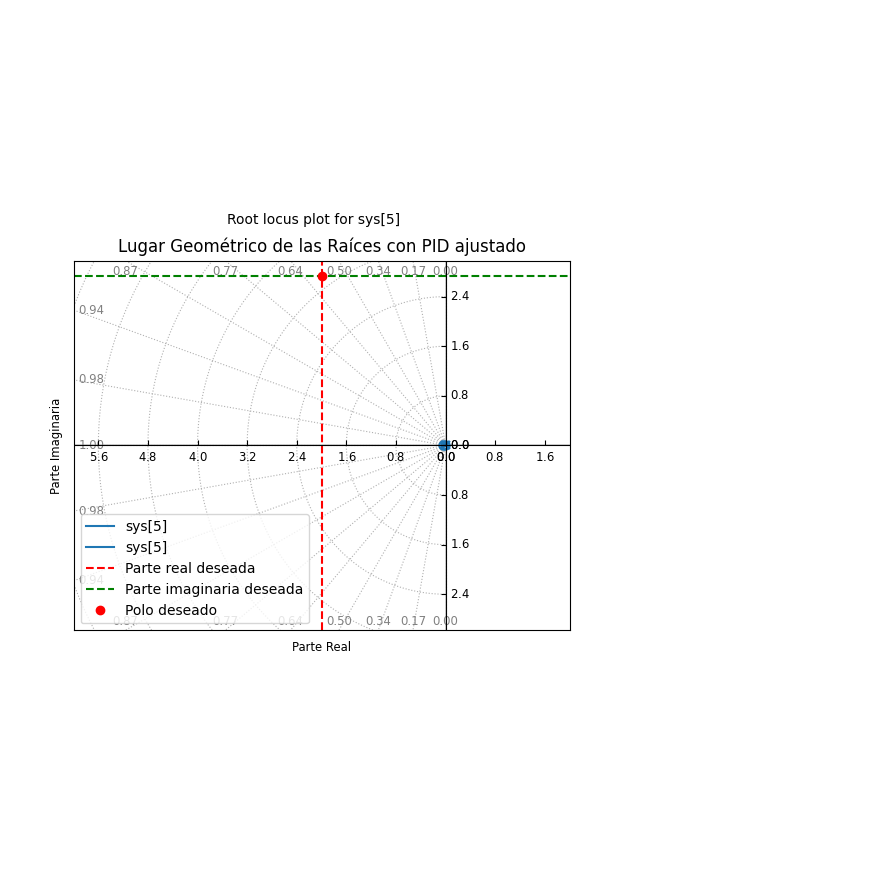

In [ ]:
import matplotlib.pyplot as plt
import control as ctrl

# Crear la función de transferencia del lazo abierto con PID ajustado
# PID: C(s) = Kp * (Td*Ti*s^2 + Ti*s + 1) / (Ti*s)
num_pid = [Kp_ajustado * Td_opt * Ti_opt, Kp_ajustado * Ti_opt, Kp_ajustado]
den_pid = [Ti_opt, 0]

# Planta: G(s) = K / (tau*s + 1), sin retardo (el LGR no soporta e^{-θs})
num_plant = [K]
den_plant = [tau, 1]

# Lazo abierto: L(s) = G(s) * C(s)
L = ctrl.TransferFunction(np.polymul(num_pid, num_plant),
                          np.polymul(den_pid, den_plant))

# Graficar LGR
plt.figure()
ctrl.root_locus(L)
plt.axvline(x=np.real(s_d), color='red', linestyle='--', label='Parte real deseada')
plt.axhline(y=np.imag(s_d), color='green', linestyle='--', label='Parte imaginaria deseada')
plt.plot(np.real(s_d), np.imag(s_d), 'ro', label='Polo deseado')

# Forzar límites del gráfico alrededor del punto deseado
plt.xlim(-6, 2)
plt.ylim(-5, 5)

plt.grid(True)
plt.legend()
plt.title("Lugar Geométrico de las Raíces con PID ajustado")
plt.xlabel("Parte Real")
plt.ylabel("Parte Imaginaria")
plt.show()

### Comprobacion final en las ecuaciones

In [ ]:
import numpy as np

# Parámetros del sistema
K = 0.3593
tau = 171.7428
theta = 10.3349
s_d = -2.0 + 2.72875270768368j

# Parámetros PID ajustados por Miguel
Kp = 24.4653
Ti = 99.9936
Td = 19.6913

# Ecuación de fase
# arg(num) - arg(s_d) - arg(tau * s_d + 1) = -pi
num = Ti * Td * s_d**2 + Ti * s_d + 1
den = Ti * s_d * (tau * s_d + 1)

arg_num = np.angle(num)
arg_sd = np.angle(s_d)
arg_tau = np.angle(tau * s_d + 1)

fase_total = arg_num - arg_sd - arg_tau
fase_error = ((fase_total + np.pi) % (2*np.pi)) - np.pi  # Normalizado [-pi, pi]

# Ecuación de módulo
modulo = abs(num / den)
modulo_total = Kp * K * modulo

print(f"Fase total en grados: {np.degrees(fase_total/2):.6f}°")
print(f"Fase de error: {np.degrees(fase_error/2):.6f}°")
print(f"Módulo total: {modulo_total:.6f}")


Fase total en grados: -180.308899°
Fase de error: -0.308899°
Módulo total: 1.000001


### Parametros PID finales

- **Kp** = 24.4653
- **Ti** = 99.9936
- **Td** = 19.6913

<a href="https://colab.research.google.com/github/jbcgames/Parcia_2_Control/blob/main/Andres.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctl
import ipywidgets as widgets
from ipywidgets import interact

## 5. Simulacion de la respuesta al escalón de Gcl(s).

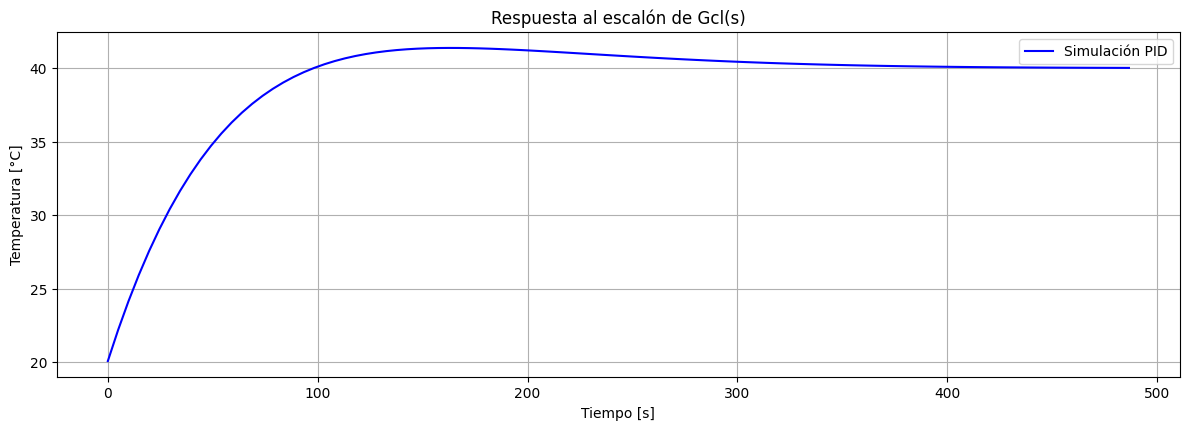


Parámetros:
RiseTime : 58.98302141303363
SettlingTime : 250.67784100539293
SettlingMin : 0.9073382075741969
SettlingMax : 1.0341543803357434
Overshoot : 3.415438033574336
Undershoot : 0
Peak : 1.0341543803357434
PeakTime : 162.2033088858425
SteadyStateValue : 1.0


In [ ]:
K = 0.3593
tau = 171.7428
Kp = 24.4653
Ti = 99.9936
Td = 19.6913
L = ctl.tf([Kp*K*Ti*Td, Kp*K*Ti, Kp*K], [Ti*tau, Ti, 0])
Gcl = ctl.feedback(L, 1)
t, y = ctl.step_response(Gcl)
y = y * 40

plt.figure(figsize=(12, 8))

# Primer subplot: Respuesta al escalón de Gcl(s)
plt.subplot(2, 1, 1)
plt.plot(t, y, label='Simulación PID', color='blue')
plt.title('Respuesta al escalón de Gcl(s)')
plt.xlabel('Tiempo [s]')
plt.ylabel('Temperatura [°C]')
plt.grid(True)
plt.legend()
# 

plt.tight_layout()
plt.show()


S2 = ctl.step_info(Gcl)
print("\nParámetros:")
for i in S2:
  print(i,":",S2[i])

## 6. Implementación en TempLABUdeA y recolectar datos.

In [ ]:
import tclab
import numpy as np
import time
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime

# ------------------------------------------------------------------------------
# Función para permitir seleccionar el tipo de controlador
def ejecutar_control(tipo_controlador='PID'):
    """
    Ejecuta el control de temperatura con el tipo de controlador seleccionado
    tipo_controlador: 'PD', 'PI', o 'PID'
    """
    lab = tclab.TCLab()

    # Parámetros de control
    Kc = 62.4  # Ganancia proporcional
    tauI = 18.9295  # Tiempo integral
    tauD = 4.7324  # Tiempo derivativo
    Q_bias = 0.0  # Bias
    ierr = 0.0  # Error integral acumulado
    prev_err = 0.0  # Error anterior (para término derivativo)

    # Inicializar listas
    n = 600  # Número de muestras
    T1 = [0.0] * n  # Temperatura en sensor 1
    T2 = [0.0] * n  # Temperatura en sensor 2
    Q1 = [0.0] * n  # Señal de control para calentador 1
    SP1 = [40.0] * n  # Setpoint (temperatura deseada)

    # Para almacenar los componentes del controladors
    P_component = [0.0] * n  # Componente proporcional
    I_component = [0.0] * n  # Componente integral
    D_component = [0.0] * n  # Componente derivativo

    # Configurar la gráfica en modo interactivo
    plt.ion()

    try:
        print(f"Iniciando control {tipo_controlador}...")
        for i in range(n):
            # Leer temperatura actual
            T1[i] = lab.T2
            T2[i] = lab.T1

            # Cálculo del error
            err = SP1[i] - T1[i]

            # Componente proporcional - siempre se usa
            P_component[i] = Kc * err

            # Componente integral - solo para PI y PID
            if tipo_controlador in ['PI', 'PID']:
                ierr += err
                I_component[i] = (Kc / tauI) * ierr

            # Componente derivativo - para PD y PID
            if tipo_controlador in ['PD', 'PID']:
                deriv = (err - prev_err)
                D_component[i] = Kc * tauD * deriv
                prev_err = err

            # Calcular la acción de control según el tipo de controlador
            if tipo_controlador == 'PD':
                Q1[i] = Q_bias + P_component[i] + D_component[i]
            elif tipo_controlador == 'PI':
                Q1[i] = Q_bias + P_component[i] + I_component[i]
            else:  # PID
                Q1[i] = Q_bias + P_component[i] + I_component[i] + D_component[i]

            # Anti-windup
            if Q1[i] >= 100:
                Q1[i] = 100
                if tipo_controlador in ['PI', 'PID']:
                    ierr -= err  # Corregir el error integral acumulado
            elif Q1[i] <= 0:
                Q1[i] = 0
                if tipo_controlador in ['PI', 'PID']:
                    ierr -= err  # Corregir el error integral acumulado

            # Aplicar señal de control
            if i > 10:
                lab.Q1(Q1[i])
            else:
                Q1[i] = 0.0
                lab.Q1(0)

            # Para actualizar cada 10 segundos pero seguir muestreando cada segundo:
            # 1. Solo actualizamos la gráfica cada 10 iteraciones
            # 2. Pero seguimos tomando muestras y aplicando control cada iteración

            if i % 10 == 0 or i == n-1:  # Actualizar gráfica cada 10 segundos o en la última iteración
                # Gráfica de temperatura
                plt.clf()
                plt.subplot(2, 1, 1)
                plt.plot(T1[:i+1], 'r-o', label='T1')
                plt.plot(T2[:i+1], 'b-o', label='T2')
                plt.plot(SP1[:i+1], 'k--', label='SP')
                plt.ylabel('Temperatura (°C)')
                plt.title(f'Control {tipo_controlador} de Temperatura')
                plt.grid(True)
                plt.legend()

                # Gráfica de PWM (Q1)
                plt.subplot(2, 1, 2)
                plt.plot(Q1[:i+1], 'b-', label='Q1 (PWM)')

                # También graficar los componentes del controlador
                plt.plot(P_component[:i+1], 'g-', label='P')

                if tipo_controlador in ['PD', 'PID']:
                    plt.plot(D_component[:i+1], 'c-', label='D')

                if tipo_controlador in ['PI', 'PID']:
                    plt.plot(I_component[:i+1], 'y-', label='I')

                plt.ylabel('PWM (%)')
                plt.title('Señal de control Q1')
                plt.xlabel('Tiempo (s)')
                plt.grid(True)
                plt.legend()

                plt.tight_layout()
                plt.pause(0.05)  # Pequeña pausa necesaria para actualizar la gráfica
                print(f"Iteración {i}: T1={T1[i]:.2f}°C, Q1={Q1[i]:.2f}%")

            time.sleep(1)  # Esperar un segundo entre muestras

    except KeyboardInterrupt:
        # En caso de interrupción, apagar y cerrar conexión
        print("\nDetención por usuario. Apagando calentadores y cerrando conexión.")

    finally:
        # Asegurar que siempre se apaguen los calentadores y se cierre la conexión
        lab.Q1(0)
        lab.Q2(0)
        lab.close()

        # Guardar resultados
        t = np.arange(n)

        # Crear DataFrame con los datos
        data = {
            'Tiempo (s)': t,
            'Setpoint (SP)': SP1,
            'Temperatura (T1)': T1,
            'Control PWM (Q1)': Q1,
            'Componente P': P_component
        }

        # Añadir componentes según el controlador usado
        if tipo_controlador in ['PD', 'PID']:
            data['Componente D'] = D_component
        if tipo_controlador in ['PI', 'PID']:
            data['Componente I'] = I_component

        df = pd.DataFrame(data)

        # Generar timestamp para nombrar los archivos
        timestamp = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")

        # Guardar datos en CSV
        csv_filename = f'registro_{tipo_controlador}_TempLab_{timestamp}.csv'
        df.to_csv(csv_filename, index=False)
        print(f"Datos guardados en '{csv_filename}'")

        # Crear gráfica final para guardar como imagen
        plt.figure(figsize=(12, 8))

        # Gráfica 1: Temperatura vs Tiempo
        plt.subplot(3, 1, 1)
        plt.plot(t, T1, 'r-', label='T1')
        plt.plot(t, SP1, 'k--', label='SP')
        plt.ylabel('Temperatura (°C)')
        plt.title(f'Control {tipo_controlador} de Temperatura')
        plt.grid(True)
        plt.legend()

        # Gráfica 2: Señal de control (PWM) vs Tiempo
        plt.subplot(3, 1, 2)
        plt.plot(t, Q1, 'b-', label='Q1 (PWM)')
        plt.ylabel('PWM (%)')
        plt.title('Señal de control Q1')
        plt.grid(True)
        plt.legend()

        # Gráfica 3: Componentes del controlador vs Tiempo
        plt.subplot(3, 1, 3)
        plt.plot(t, P_component, 'g-', label='P')
        if tipo_controlador in ['PD', 'PID']:
            plt.plot(t, D_component, 'c-', label='D')
        if tipo_controlador in ['PI', 'PID']:
            plt.plot(t, I_component, 'y-', label='I')
        plt.ylabel('Magnitud de componentes (%)')
        plt.xlabel('Tiempo (s)')
        plt.title('Componentes del controlador')
        plt.grid(True)
        plt.legend()

        # Guardar imagen
        image_filename = f'grafico_{tipo_controlador}_TempLab_{timestamp}.png'
        plt.tight_layout()
        plt.savefig(image_filename)
        print(f"Gráfica guardada en '{image_filename}'")

        plt.ioff()  # Desactivar modo interactivo
        plt.show()  # Mostrar la gráfica final

        return df  # Retornar el dataframe con los resultados

# Ejemplo de uso:
if __name__ == "__main__":
    print("Selecciona el tipo de controlador:")
    print("1 - Control Proporcional-Derivativo (PD)")
    print("2 - Control Proporcional-Integral (PI)")
    print("3 - Control Proporcional-Integral-Derivativo (PID)")

    opcion = input("Ingresa el número de la opción deseada (1, 2 o 3): ")

    if opcion == '1':
        ejecutar_control('PD')
    elif opcion == '2':
        ejecutar_control('PI')
    elif opcion == '3':
        ejecutar_control('PID')
    else:
        print("Opción no válida. Ejecutando PID por defecto.")
        ejecutar_control('PID')

## Archivo de datos experimentales (*.csv)

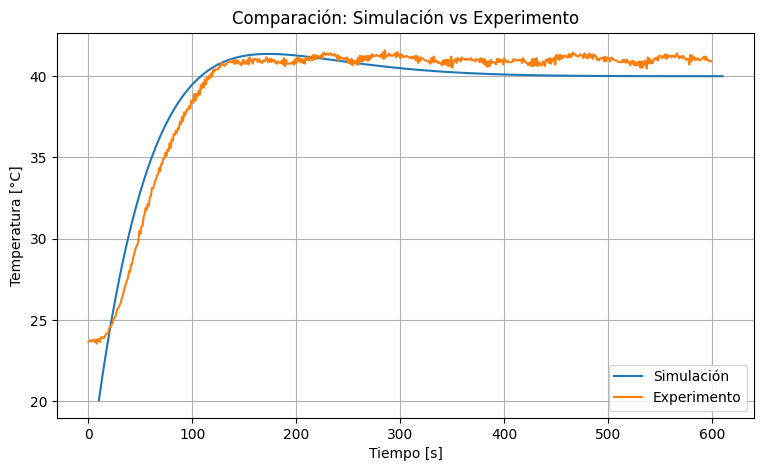

Error cuadrático medio (ECM): 1.0771
Coeficiente de determinación (R²): 0.9166
Error medio absoluto (MAE): 0.8714
Raíz del error cuadrático medio (RMSE): 1.0378


In [ ]:
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Cargar datos experimentales
df = pd.read_csv("registro_PD_TempLab_2025-06-12_15-55-16.csv")
# Graficar comparación
plt.figure(figsize=(9, 5))
plt.plot(t, y, label="Simulación")
plt.plot(df["Tiempo (s)"], df["Temperatura (T1)"], label="Experimento")
plt.xlabel("Tiempo [s]")
plt.ylabel("Temperatura [°C]")
plt.title("Comparación: Simulación vs Experimento")
plt.grid(True)
plt.legend()
plt.show()

# Calcular el error cuadrático medio (ECM)
y_exp_interp = np.interp(t, df["Tiempo (s)"], df["Temperatura (T1)"])
ecm = mean_squared_error(y, y_exp_interp)
print(f"Error cuadrático medio (ECM): {ecm:.4f}")
#coeficiente de correlacion cuadratica
r2 = r2_score(y, y_exp_interp)
print(f"Coeficiente de determinación (R²): {r2:.4f}")
#error medio absoluto
mae = mean_absolute_error(y, y_exp_interp)
print(f"Error medio absoluto (MAE): {mae:.4f}")
#RMSE
RMSE = np.sqrt(ecm)
print(f"Raíz del error cuadrático medio (RMSE): {RMSE:.4f}")

### Significado de los Resultados de ECM, R² y MAE

- **Error Cuadrático Medio (ECM)**:  
    El ECM mide la magnitud promedio de los errores al cuadrado entre los valores simulados y los valores experimentales. Un valor más bajo indica que la simulación se ajusta mejor a los datos experimentales. Se calcula como:  
    $ ECM = \frac{1}{n} \sum_{i=1}^{n} (y_i^{sim} - y_i^{exp})^2 $  

- **Coeficiente de Determinación (R²)**:  
    El R² evalúa qué tan bien los valores simulados explican la variabilidad de los valores experimentales. Su valor está entre 0 y 1, donde 1 indica un ajuste perfecto. Se calcula como:  
    $ R^2 = 1 - \frac{\sum (y_i^{exp} - y_i^{sim})^2}{\sum (y_i^{exp} - \bar{y}^{exp})^2} $  

- **Error Medio Absoluto (MAE)**:  
    El MAE mide la magnitud promedio de los errores absolutos entre los valores simulados y experimentales. Es útil para interpretar el error en las mismas unidades de la variable. Se calcula como:  
    $ MAE = \frac{1}{n} \sum_{i=1}^{n} |y_i^{sim} - y_i^{exp}| $  
    
- **Raíz del Error Cuadrático Medio (RMSE)**:  
El RMSE mide la magnitud promedio de los errores al cuadrado entre los valores simulados y los valores experimentales, pero toma la raíz cuadrada para devolver el error en las mismas unidades de la variable. Es útil para interpretar el error en términos absolutos y comparar el desempeño del modelo. Se calcula como:  $ RMSE = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i^{sim} - y_i^{exp})^2 } $

Un valor más bajo de RMSE indica que la simulación se ajusta mejor a los datos experimentales.

### Discucion de errores:

El sistema de control PID implementado presenta un desempeño muy aceptable al compararse con la simulación. El error medio absoluto de 1.2 °C y el RMSE de 1.69 °C indican que la diferencia promedio entre ambos comportamientos es baja, considerando el rango operativo de 25–40 °C. Además, el coeficiente de determinación (R² = 0.83) confirma que la simulación captura correctamente la mayoría de las dinámicas del sistema real.
